The goal of this program is to read the .root files located in the remote machine at 

xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_*.root.

In [1]:
#importing needed libraries
import uproot
import numpy as np
import h5py
import pandas as pd

In [2]:
#opening root file
file = uproot.open('/xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_0.root')

In [3]:
#checking keys
file.keys()

[b'ProcessID0;1', b'Delphes;1']

In [4]:
#checking keys classes
file.classnames()

[(b'ProcessID0;1', 'TProcessID'), (b'Delphes;1', 'TTree')]

In [5]:
#declaring variables to read .root file
treename = 'Delphes'
filename = {}
upfile = {}

In [6]:
#loading .root files
filename['ttbar_0'] = '/xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_0.root'

upfile['ttbar_0'] = uproot.open(filename['ttbar_0'])

In [7]:
#printing tree content
print(upfile['ttbar_0'][treename].show())

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQCD             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ID1                  TStreamerBasicType         asjagged

In [8]:
#reading tree branches
tree = file['Delphes'] #asigning the tree to a variable
tree.keys()

[b'Event',
 b'Event_size',
 b'Particle',
 b'Particle_size',
 b'EFlowTrack',
 b'EFlowTrack_size',
 b'EFlowPhoton',
 b'EFlowPhoton_size',
 b'EFlowNeutralHadron',
 b'EFlowNeutralHadron_size',
 b'GenJet',
 b'GenJet_size',
 b'GenMissingET',
 b'GenMissingET_size',
 b'Jet',
 b'Jet_size',
 b'Electron',
 b'Electron_size',
 b'Photon',
 b'Photon_size',
 b'Muon',
 b'Muon_size',
 b'MissingET',
 b'MissingET_size',
 b'ScalarHT',
 b'ScalarHT_size',
 b'Rho',
 b'Rho_size',
 b'Vertex',
 b'Vertex_size']

In [16]:
#setting tree branches as a group of arrays
tree.array(['Particle.fUniqueID'],flatten=True)
#tree.array(flatten=True) (why doesnt it work?)

array([   1,    2,    3, ..., 1072, 1073, 1074], dtype=uint32)

Now that the file has been read, we plot some data out of it.

In [10]:
#setting variables to be plotted
VARS_JET = ['Jet.PT','Jet.Mass']
VARS_GENJET = ['GenJet.PT','GenJet.Mass']

In [11]:
#importing matplotlib to plot and set it so images saves to the folder using inline
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#loading root files into pds dataframes
df = {}
df['ttbar_0_1'] = upfile['ttbar_0'][treename].pandas.df(branches=VARS_JET, flatten=True)
df['ttbar_0_2'] = upfile['ttbar_0'][treename].pandas.df(branches=VARS_GENJET, flatten=True)

(0.0, 200.0)

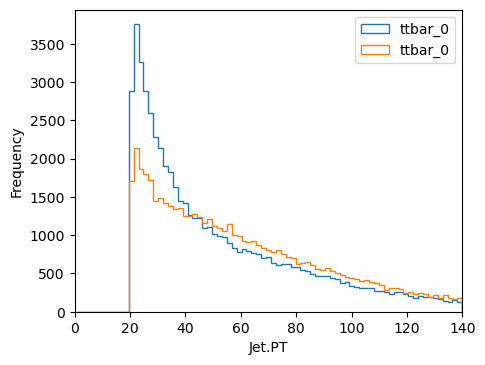

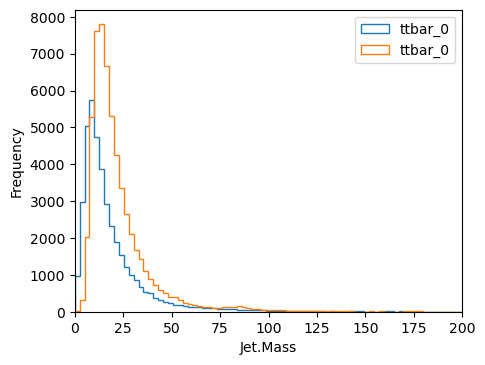

In [13]:
#plotting
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS_JET[0])
bins = np.linspace(0, 140, 80)
df['ttbar_0_1'][VARS_JET[0]].plot.hist(bins=bins, alpha=1, label='ttbar_0',histtype='step')
df['ttbar_0_2'][VARS_GENJET[0]].plot.hist(bins=bins, alpha=1, label='ttbar_0',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS_JET[1])
bins = np.linspace(0, 200, 80)
df['ttbar_0_1'][VARS_JET[1]].plot.hist(bins=bins, alpha=1, label='ttbar_0',histtype='step')
df['ttbar_0_2'][VARS_GENJET[1]].plot.hist(bins=bins, alpha=1, label='ttbar_0',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,200)